In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
rfmMore = pd.read_csv('morefeature/rfmMore.csv')
rfmMoreCut = rfmMore.loc[(rfmMore['money']<5000)&(rfmMore['age']>10)]

In [20]:
rfmMoreCut=rfmMoreCut.set_index('会员编号')

In [21]:
rfmMoreCut.head()

,money,recent,frequency,sex,age
会员编号,,,,,
1027478498,439.5,4,20,2,21
1030794986,1.0,57,1,1,37
1030797014,248.0,38,15,1,31
1030904479,4.0,50,2,2,36
1033252014,1309.0,39,29,2,36


In [8]:
rfmMore.shape[0]-rfmMoreCut.shape[0]

217

In [54]:
rfmMoreCut.head()

,money,recent,frequency,sex,age
会员编号,,,,,
1027478498,439.5,4,20,2,21
1030794986,1.0,57,1,1,37
1030797014,248.0,38,15,1,31
1030904479,4.0,50,2,2,36
1033252014,1309.0,39,29,2,36


In [55]:
rfmMoreCut.to_csv('morefeaCut/rfmMoreCut.csv')

In [9]:
rfmMore.loc[(rfmMore['age']<10)].shape[0]

87

In [22]:
rfm_log = rfmMoreCut[['money', 'recent','frequency','sex','age']].apply(np.log, axis = 1).round(2)
rfm_log.describe()

,money,recent,frequency,sex,age
count,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000
mean,6.827190,2.693690,3.086415,0.382006,3.464037
std,0.763662,0.943848,0.303960,0.343042,0.237059
min,0.000000,0.000000,0.000000,0.000000,2.400000
25%,6.390000,2.200000,2.940000,0.000000,3.330000
50%,6.880000,3.000000,3.090000,0.690000,3.470000
75%,7.350000,3.430000,3.260000,0.690000,3.610000
max,8.520000,4.090000,4.500000,0.690000,4.810000


In [23]:
rfm_log_zs = (rfm_log -rfm_log.mean())/rfm_log.std()
rfm_log_zs.describe()

,money,recent,frequency,sex,age
count,5.314000e+03,5.314000e+03,5.314000e+03,5.314000e+03,5.314000e+03
mean,1.141361e-14,-6.422429e-14,-4.422106e-14,-6.499714e-14,-8.011991e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.940064e+00,-2.853945e+00,-1.015402e+01,-1.113584e+00,-4.488488e+00
25%,-5.724918e-01,-5.230611e-01,-4.816920e-01,-1.113584e+00,-5.654141e-01
50%,6.915302e-02,3.245329e-01,1.179389e-02,8.978321e-01,2.515615e-02
75%,6.846083e-01,7.801146e-01,5.710779e-01,8.978321e-01,6.157264e-01
max,2.216699e+00,1.479380e+00,4.650561e+00,8.978321e-01,5.677757e+00


In [24]:
from sklearn.cluster import KMeans
ks = range(1, 17)
inertias = []
for k in ks:
    kc = KMeans(n_clusters = k, random_state = 1)
    kc.fit(rfm_log_zs)
    inertias.append(kc.inertia_)

<IPython.core.display.Javascript object>


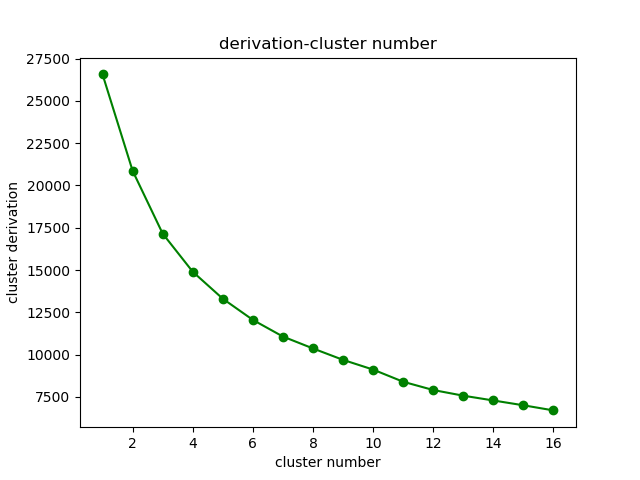

In [25]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
plt.plot(ks, inertias, 'g-o')
plt.xlabel('cluster number')
plt.ylabel('cluster derivation')
plt.title('derivation-cluster number')
plt.savefig('morefeaCut/clusterNum-Derivation.png')
plt.show()

In [27]:
rfm_kn.head()

,money,recent,frequency,sex,age,cluster
会员编号,,,,,,
1027478498,439.5,4,20,2,21,2
1030794986,1.0,57,1,1,37,1
1030797014,248.0,38,15,1,31,1
1030904479,4.0,50,2,2,36,1
1033252014,1309.0,39,29,2,36,3


In [26]:
clusterNum = 4
model = KMeans(n_clusters = clusterNum, random_state = 1)
model.fit(rfm_log_zs)
cluster_labels = model.labels_
rfm_kn = rfmMoreCut.assign(cluster = cluster_labels)
rfm_kn.groupby('cluster').agg({'money':['mean','count'], 'recent':'mean','frequency':'mean'}).round(2)

money       recent frequency
            mean count   mean      mean
cluster                                
0        1273.92  1756  20.20     23.72
1         362.97  1062  30.36     16.09
2        1312.71   783   2.88     23.94
3        1559.31  1713  21.52     25.78

In [35]:
clusterIndex.head()

,money,recent,frequency,sex,age,cluster
会员编号,,,,,,
1033252024,3396.0,59,31,1,36,0
1033252031,2343.0,23,45,1,36,0
1033252032,2192.0,37,35,1,36,0
1033252037,4373.0,16,58,1,34,0
1033252045,1244.0,18,23,1,36,0


<IPython.core.display.Javascript object>


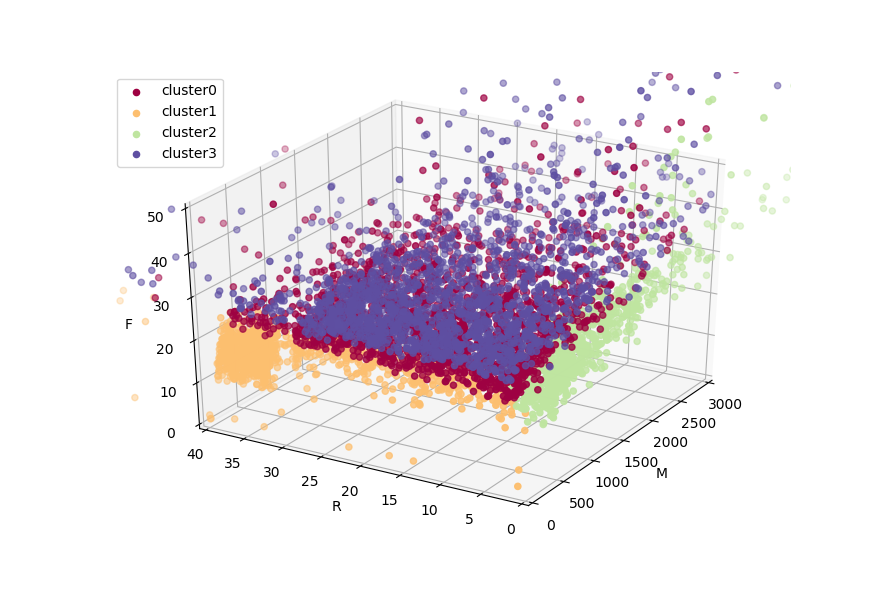

In [45]:
%matplotlib notebook
from mpl_toolkits.mplot3d import proj3d
ax = plt.subplot(111, projection = '3d')
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=(clusterNum-1))
for i in range(clusterNum):
    clusterIndex=rfm_kn.loc[rfm_kn['cluster']==i]
    ax.scatter(clusterIndex.iloc[:, 0], clusterIndex.iloc[:, 1], clusterIndex.iloc[:, 2], c = cmap(norm(clusterIndex.iloc[0, 5])),label='cluster{}'.format(i))
ax.set_xlabel('M')
ax.set_xlim([0,3000])
ax.set_ylabel('R')
ax.set_ylim([0,40])
ax.set_zlabel('F')
ax.set_zlim([0, 50])
ax.legend()

In [46]:
clusterNum = 3
model = KMeans(n_clusters = clusterNum, random_state = 1)
model.fit(rfm_log_zs)
cluster_labels = model.labels_
rfm_kn = rfmMoreCut.assign(cluster = cluster_labels)
rfm_kn.groupby('cluster').agg({'money':['mean','count'], 'recent':'mean','frequency':'mean'}).round(2)

money       recent frequency
            mean count   mean      mean
cluster                                
0        1282.33  2019  17.51     23.76
1         385.75  1166  30.45     16.42
2        1541.85  2129  16.90     25.62

<IPython.core.display.Javascript object>


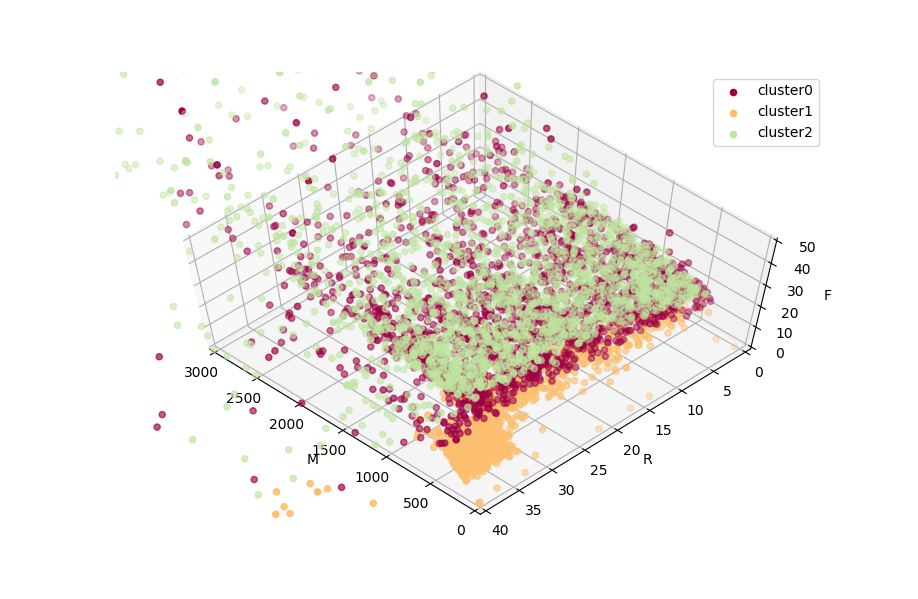

In [50]:
%matplotlib notebook
from mpl_toolkits.mplot3d import proj3d
ax = plt.subplot(111, projection = '3d')
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=(3))
for i in range(clusterNum):
    clusterIndex=rfm_kn.loc[rfm_kn['cluster']==i]
    ax.scatter(clusterIndex.iloc[:, 0], clusterIndex.iloc[:, 1], clusterIndex.iloc[:, 2], c = cmap(norm(clusterIndex.iloc[0, 5])),label='cluster{}'.format(i))
ax.set_xlabel('M')
ax.set_xlim([0,3000])
ax.set_ylabel('R')
ax.set_ylim([0,40])
ax.set_zlabel('F')
ax.set_zlim([0, 50])
ax.legend()

In [51]:
clusterNum = 5
model = KMeans(n_clusters = clusterNum, random_state = 1)
model.fit(rfm_log_zs)
cluster_labels = model.labels_
rfm_kn = rfmMoreCut.assign(cluster = cluster_labels)
rfm_kn.groupby('cluster').agg({'money':['mean','count'], 'recent':'mean','frequency':'mean'}).round(2)

money       recent frequency
            mean count   mean      mean
cluster                                
0        2322.06   903  18.96     31.90
1        1224.81   655   2.52     22.89
2         256.80   628  34.83     14.68
3        1181.05  1685  20.37     22.88
4         880.81  1443  22.10     20.83

<IPython.core.display.Javascript object>


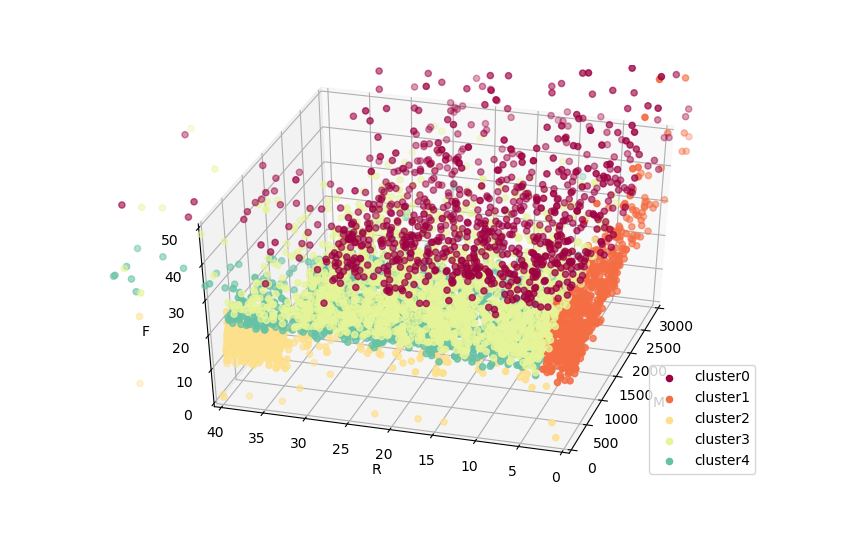

In [53]:
%matplotlib notebook
from mpl_toolkits.mplot3d import proj3d
ax = plt.subplot(111, projection = '3d')
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=(5))
for i in range(clusterNum):
    clusterIndex=rfm_kn.loc[rfm_kn['cluster']==i]
    ax.scatter(clusterIndex.iloc[:, 0], clusterIndex.iloc[:, 1], clusterIndex.iloc[:, 2], c = cmap(norm(clusterIndex.iloc[0, 5])),label='cluster{}'.format(i))
ax.set_xlabel('M')
ax.set_xlim([0,3000])
ax.set_ylabel('R')
ax.set_ylim([0,40])
ax.set_zlabel('F')
ax.set_zlim([0, 50])
ax.legend()